# Oppgaver a-d
## a) 
Last ned fila maxwell.zip og ”pakk ut” de 49 txt-filene. Lag et program som:

- [x] leser inn alle verdier for t, x og y fra de 49 filene,
- [x] beregner vx, vy og v, i alt 920 av hver,
- [x] plotter histogram for skivenes fartsfordeling f(v) og skivenes fordeling av hastighetskomponenter g(vx) og g(vy),
- [x] lager spredningsplott (”scatter plot”) av vx vs vy og x vs y for alle m˚alte verdier.

In [56]:
import numpy as np
import os
import matplotlib.pyplot as plt
from natsort import natsorted

In [57]:
if os.name == 'posix': # Om man jobber på en mac vil den bruke denne pathen (jobber på to platformer mye)
    os.chdir(r'/Users/sebastianredzic/Documents/Python V2024/maxwell' )

elif os.name == 'nt': # Samme men hvis det er windows
    os.chdir(r'C:\Users\Sebbi\Desktop\maxwell')

else: # Hvis systemnavnet er ukjent
    print('Os unknown / Path unknown')
    exit()

path = os.getcwd() # Universal path

def FileNames(path): # Drar ut path til alle filer
    filelist = []

    # Sjekker om path og dir faktisk finnes (returnerer bool)
    pathExists = os.path.exists(path)
    isDir = os.path.isdir(path)

    if pathExists and isDir:
        for dirpaths, dirs, files in os.walk(path):
            for file in files:
                filelist.append(os.path.join(dirpaths, file))
    
    return natsorted(filelist) # Sorterer filene slik at det blir mass8_1, mass8_2, mass8_3, ..., mass8_49

# Kalkulerer de ulike fordelingene for v_i
def g_vi(vi, B):
    return np.sqrt(B/np.pi) * np.exp(-B*vi**2)

def f_v(v, B):
    return 2*B*v*np.exp(-B*v**2)

def meansquaredv(vi):
    return np.mean(vi**2)

# Definer de teoretiske fordelingene
def g_v(v_component, B):
    return g_vi(v_component, B)

def f_v_func(v, B):
    return f_v(v, B)


In [58]:
t, x, y = [], [], []  # Danner lister for å eksportere data fra filer

for file in FileNames(path):
    with open(file, 'r') as f:
        # Skipper 2 første linjene (uønskede strenger)
        n = 0
        for i in range(2):
            next(f)

        # Går gjennom resten av linjene
        for line in f:
            n += 1
            column = line.split('\t')
            t.append(float(column[0]))
            x.append(float(column[1]) * 0.22) # cm
            y.append(float(column[2]) * 0.22) # cm

        # Skriver inn END markører for å skille filer fra hverandre (mer effektivt med matriser men orker ikke)
        t.append("END")
        x.append("END")
        y.append("END")

# Lager tomme lister for farter
v_x, v_y, v = [], [], []

for i in range(len(t) - 1):
    if type(t[i]) == float and type(t[i+1]) == float:
        delta_t = t[i+1] - t[i]
        if delta_t != 0:  # Vil ikke dele på 0
            v_x.append((x[i+1] - x[i]) / delta_t)
            v_y.append((y[i+1] - y[i]) / delta_t)
            v.append(np.sqrt(v_x[-1]**2 + v_y[-1]**2))

# Konverterer listene til numpy arrays (lettere å jobbe med)
v_x = np.array(v_x)
v_y = np.array(v_y)
v = np.array(v)

t = np.array([val for val in t if type(val) == float])
x = np.array([val for val in x if type(val) == float])
y = np.array([val for val in y if type(val) == float])

# Beregn B for hver komponent og fart
B_vx = 1 / meansquaredv(v_x)
B_vy = 1 / meansquaredv(v_y)
B_v = 1 / meansquaredv(v)

Antall bins (M) bestemt av Rice-regelen: 20


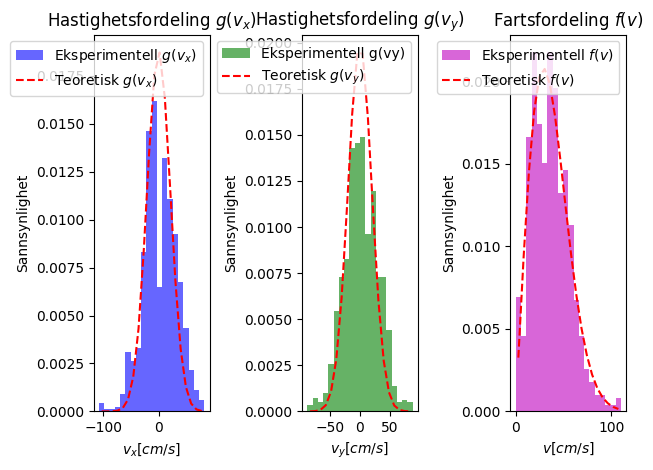

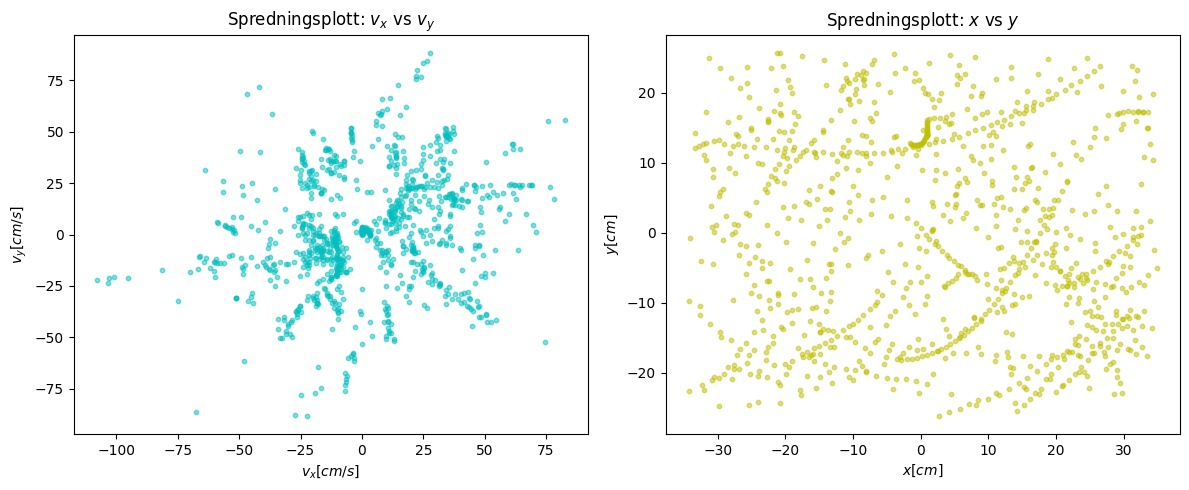

In [59]:
# Bestem antall bins med Rice-regelen
N = len(v)
M = int(np.ceil(2 * N**(1/3)))  # Rice's rule
print(f"Antall bins (M) bestemt av Rice-regelen: {M}")

# Histogram for v_x
plt.subplot(1, 3, 1)
counts_vx, bins_vx, _ = plt.hist(v_x, bins=M, density=True, alpha=0.6, color='b', label='Eksperimentell $g(v_x)$')
bin_centers_vx = (bins_vx[:-1] + bins_vx[1:]) / 2
plt.plot(bin_centers_vx, g_v(bin_centers_vx, B_vx), 'r--', label='Teoretisk $g(v_x)$')
plt.xlabel('$v_x [cm/s]$')
plt.ylabel('Sannsynlighet')
plt.legend()
plt.title('Hastighetsfordeling $g(v_x)$')

# Histogram for v_y
plt.subplot(1, 3, 2)
counts_vy, bins_vy, _ = plt.hist(v_y, bins=M, density=True, alpha=0.6, color='g', label='Eksperimentell g(vy)')
bin_centers_vy = (bins_vy[:-1] + bins_vy[1:]) / 2
plt.plot(bin_centers_vy, g_v(bin_centers_vy, B_vy), 'r--', label='Teoretisk $g(v_y)$')
plt.xlabel('$v_y [cm/s]$')
plt.ylabel('Sannsynlighet')
plt.legend()
plt.title('Hastighetsfordeling $g(v_y)$')

# Histogram for v
plt.subplot(1, 3, 3)
counts_v, bins_v, _ = plt.hist(v, bins=M, density=True, alpha=0.6, color='m', label='Eksperimentell $f(v)$')
bin_centers_v = (bins_v[:-1] + bins_v[1:]) / 2
plt.plot(bin_centers_v, f_v_func(bin_centers_v, B_v), 'r--', label='Teoretisk $f(v)$')
plt.xlabel('$v [cm/s]$')
plt.ylabel('Sannsynlighet')
plt.legend()
plt.title('Fartsfordeling $f(v)$')

plt.tight_layout()
plt.show()

# Lag spredningsplott (scatter plot) for v_x vs v_y og x vs y
plt.figure(figsize=(12, 5))

# Scatter plot for v_x vs v_y
plt.subplot(1, 2, 1)
plt.scatter(v_x, v_y, alpha=0.5, s=10, color='c')
plt.xlabel('$v_x [cm/s]$')
plt.ylabel('$v_y [cm/s]$')
plt.title('Spredningsplott: $v_x$ vs $v_y$')

# Scatter plot for x vs y
# Her trenger vi å filtrere ut 'None' verdier
valid_indices = [i for i in range(len(t)) if t[i] is not None]
x_valid = np.array([x[i] for i in valid_indices])
y_valid = np.array([y[i] for i in valid_indices])

plt.subplot(1, 2, 2)
plt.scatter(x_valid, y_valid, alpha=0.5, s=10, color='y')
plt.xlabel('$x [cm]$')
plt.ylabel('$y [cm]$')
plt.title('Spredningsplott: $x$ vs $y$')

plt.tight_layout()
plt.show()

## b)
Plastskivene har masse m = 32 g. Hva blir da verdien av ”Boltzmanns plastskivekonstant” kp? 
Altså anvend det klassiske ekvipartisjonsprinsippet,

$\frac{1}{2} m \langle v^2 \rangle = k_p T$

(to uavhengige kvadratiske bidrag til energien i to dimensjoner) med $T = 300 \: \text K$, og fastlegg dermed $k_p$.
Eller omvendt: Hvilken temperatur m˚atte en omgivende gass ha for ˚a gi slike plastskiver en hastighetsfordeling som m˚alt i dette eksperimentet?

In [60]:
m = 32 # g
T = 300 # K

def CalcBoltzmann_p(T, m, meansquarev):
    return 0.5 * m / 1000 * meansquarev / T

print(f'Boltzmannkonstanten k_p blir {CalcBoltzmann_p(T, m, meansquaredv(v))} J/K')


Boltzmannkonstanten k_p blir 0.09098535416081119 J/K


## c)  
Beregn plastskivenes midlere fart $\langle v \rangle$ og sammenlign med skivenes rms-hastighet $v_{\text{rms}} = \sqrt{\langle v^2 \rangle}$.
Er forholdet mellom disse forventet, dvs $\frac{\langle v \rangle}{v_{\text{rms}}} = \frac{\sqrt{\pi}}{2}$? (hvis gjerne at det blir slik i to dimensjoner.)


## d)
Gir spredningsplottene av hastigheter og posisjoner et visuelt inntrykk omtrent som forventet? Er det
tegn til drift i noen bestemt retning? Sammenlign med $\langle v_x \rangle$ og $\langle v_y \rangle$